In [668]:
### Import necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pylab 

%matplotlib inline
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Reading Loan Data Set

In [669]:
loandf =pd.read_csv("./loan.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False, encoding = "latin-1",parse_dates=['issue_d'])
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### View the dimensions of the dataframe to get an idea about the dataset

In [670]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [671]:
loandf.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [672]:
loandf.shape

(39717, 111)

##### Identifying missing data

In [673]:
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

**Check for NA values in dataset**

In [674]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

# Perform Data Cleanup

##### Drop all the column having 100% null values

In [675]:
loandf = loandf.dropna(axis=1, how='all')

**Check the % of NAs columnwise**

In [676]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### Identify the columns having 50% or more null values and remove such columns

In [677]:
loandf = loandf.dropna(thresh=len(loandf) * 0.5, axis=1)

In [678]:
loandf.shape

(39717, 54)

In [679]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [680]:
sum(loandf.duplicated(subset = "id")) == 0

True

Creating Loan Period as a derived variable from term column as Numeric variable

In [681]:
loandf['loanPeriod'] = loandf['term'].str[1:4].astype(int)
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loanPeriod
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60


Create a derived attribute zip_code_num based on column zip_code which contain only numeric value.

In [682]:
loandf["zip_code_num"] = loandf["zip_code"].str.replace('x','')
loandf["zip_code_num"] = loandf["zip_code_num"].astype(int)

Identify the unique value counts in the dataframe

In [683]:
loandf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

Remove columns with only 1 uniques value as it will not add much value to analysis

In [684]:
loandf = loandf.loc[:, loandf.nunique() != 1]

Check the dimensions of the dataframe once again

In [685]:
loandf.shape

(39717, 47)

Drop few columns 'emp_title', 'url' ,'desc', 'title', 'zip_code', 'term' as it does not add much value for the analysis

In [686]:
loandf = loandf.drop([ 'emp_title', 'url' ,'desc', 'title', 'zip_code', 'term'], axis=1)

View dataframe

In [687]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

##### Verify column earliest_cr_line -The month the borrower's earliest reported credit line was opened

In [688]:
loandf['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

##### As this information does not add much value for our analysis we can drop this column

In [689]:
loandf = loandf.drop(['earliest_cr_line'],axis =1)

In [690]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

# EDA

As the dataset contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Here we need to identify and understand which consumer attributes and loan attributes influence the tendency of default.

We will analyze all customer and loan attribute and find the impact of this attribute on loan status, whether fully paid or defaulted


          Verify the loan status and count the number of records for each status. 
          Here Status Charged Off corresponds to loan default

In [691]:
loandf['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#####   Pie Chart for  distribution of loan status

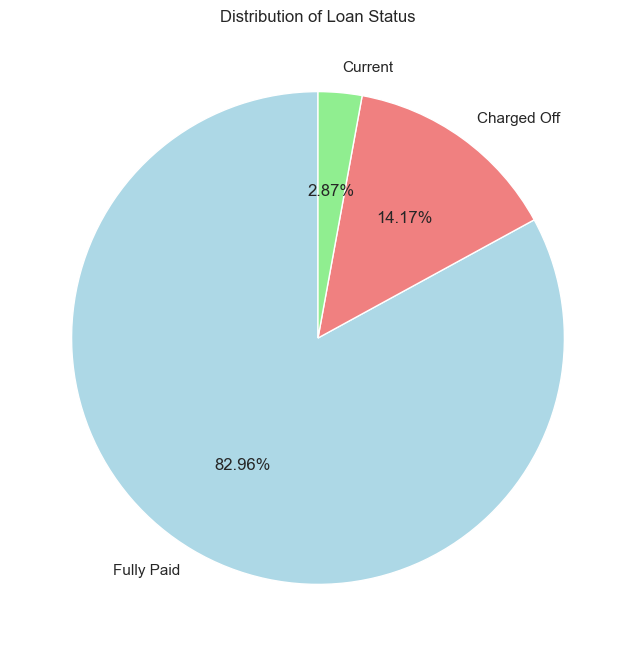

In [692]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 8))
loan_status_counts = loandf['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.2f%%', startangle=90, colors=[ 'lightblue','lightcoral','lightgreen'])
plt.title('Distribution of Loan Status')
plt.show()

View the dataSet for loan purpose and find number of record for each purpose

In [693]:
loandf['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

#####   Countplot for loan Purpose

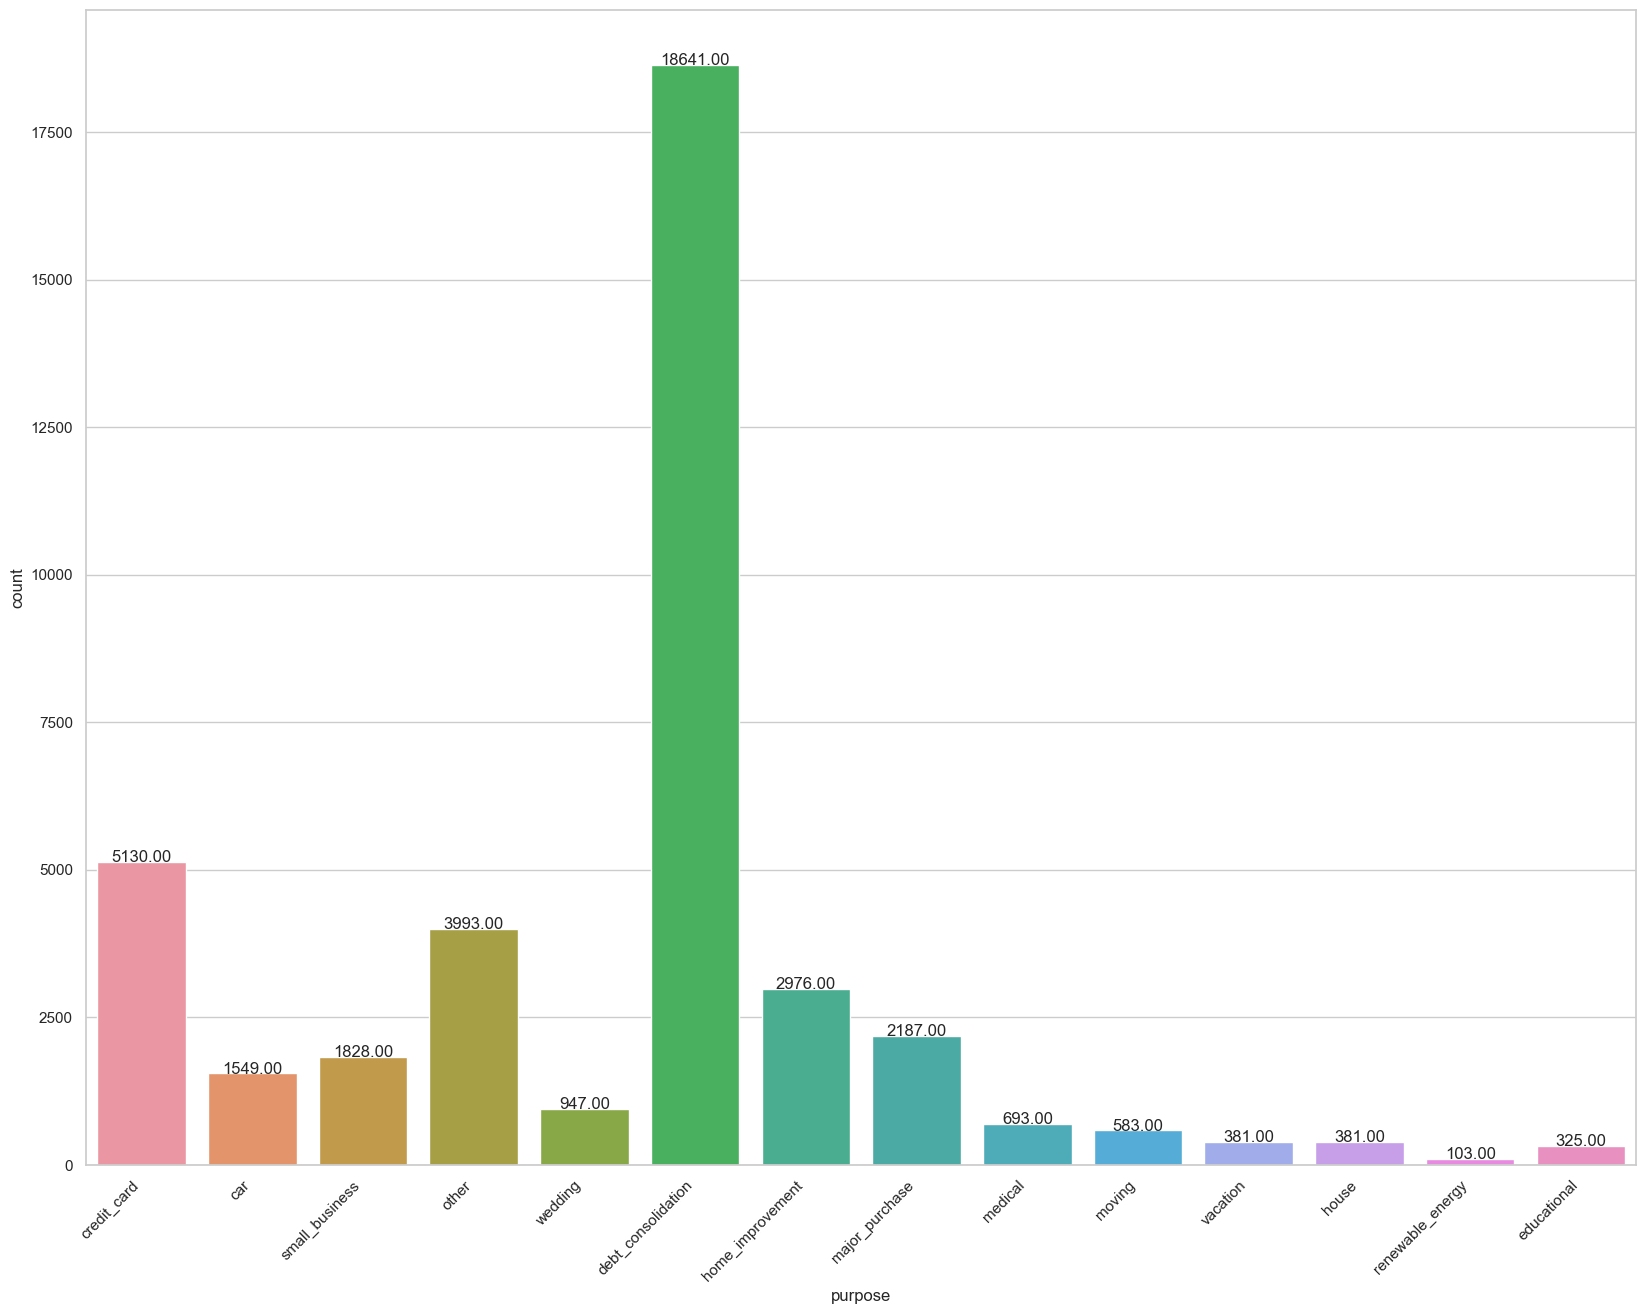

In [694]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(x="purpose", data=loandf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:1.2f}'.format(height), ha="center")

plt.show()

Lets check how loan purpose impacts the loan status

Create pivot table loandf_purpose from given loan dataset for Loan status and Loan Purpose

In [695]:
loandf_purpose = pd.pivot_table(loandf, values='loan_amnt', index='purpose', columns='loan_status', aggfunc='count')
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,NaN,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


Perform data cleaning for pivot table loandf_purpose

Replace the NaN value with 0

In [696]:
loandf_purpose.loc[pd.isnull(loandf_purpose['Current']), ['Current']] = 0
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,0.0,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


Adding new columns Aggregate and percentage of loan for each status for given purpose to pivot table 

In [697]:
loandf_purpose['Aggregate'] = loandf_purpose['Charged Off'] + loandf_purpose['Current'] + loandf_purpose['Fully Paid']
loandf_purpose['Charged Off%'] = round(loandf_purpose['Charged Off']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Current%'] = round(loandf_purpose['Current']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Fully Paid %'] = round(loandf_purpose['Fully Paid']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
purpose,,,,,,,
car,160.0,50.0,1339.0,1549.0,10.33,3.23,86.44
credit_card,542.0,103.0,4485.0,5130.0,10.57,2.01,87.43
debt_consolidation,2767.0,586.0,15288.0,18641.0,14.84,3.14,82.01
educational,56.0,0.0,269.0,325.0,17.23,0.00,82.77
home_improvement,347.0,101.0,2528.0,2976.0,11.66,3.39,84.95
house,59.0,14.0,308.0,381.0,15.49,3.67,80.84
major_purchase,222.0,37.0,1928.0,2187.0,10.15,1.69,88.16
medical,106.0,12.0,575.0,693.0,15.30,1.73,82.97
moving,92.0,7.0,484.0,583.0,15.78,1.20,83.02


Barplot for loan purpose for percentage of loan charged off ( Defaulted)

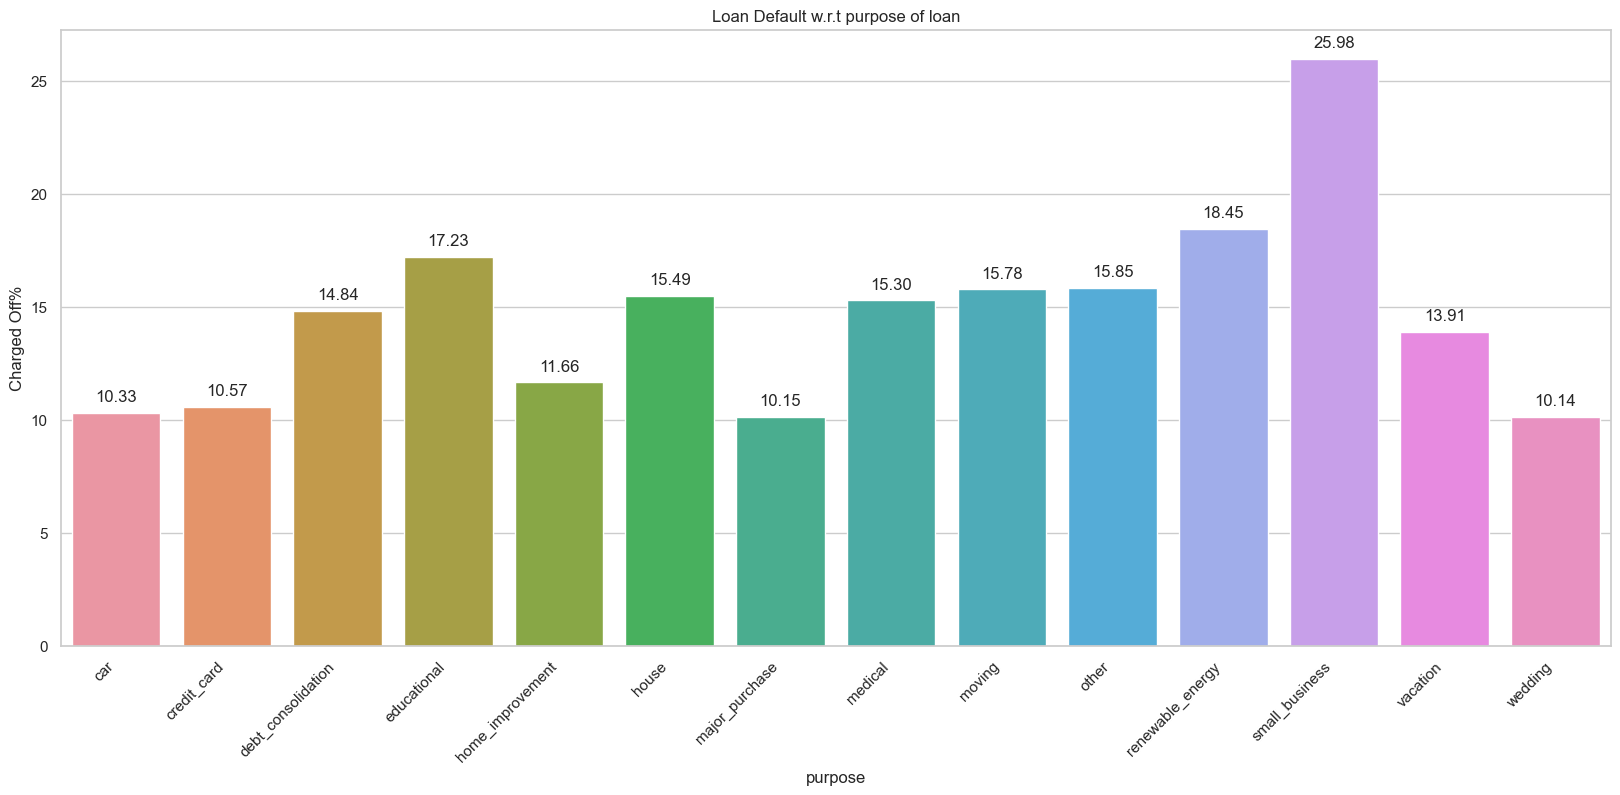

In [698]:
plt.figure(figsize=(20, 8))
plt.title('Loan Default w.r.t purpose of loan')
ax=sns.barplot(x='purpose',y = "Charged Off%", data=loandf_purpose.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 

From the above bar chat, loan for small_business contribute highest number of loan Default followed by renewable_energy

Verify the dataSet for loan period and find number of record for each period
Values are in months and can be either 36 or 60.

In [699]:
loandf['loanPeriod'].value_counts()

36    29096
60    10621
Name: loanPeriod, dtype: int64

Countplot for loan period based on loan status

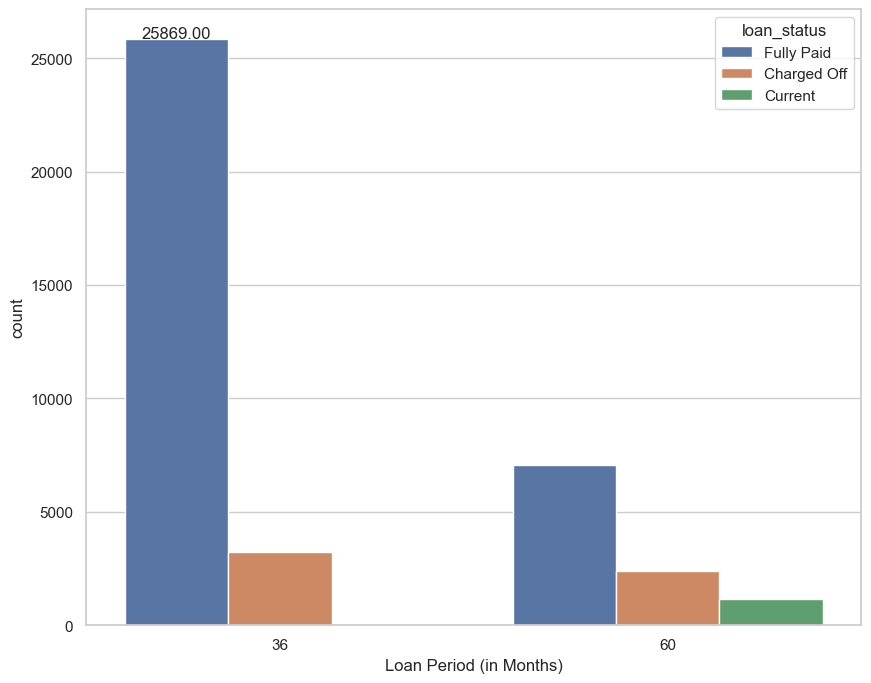

In [700]:
from matplotlib.pyplot import show
plt.figure(figsize=(10, 8))
ax=sns.countplot(x = "loanPeriod", hue = "loan_status", data = loandf)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 
    ax.set_xlabel("Loan Period (in Months)")
    show()



Create Pivot table loandf_duration for the attribute loan period and loan status, which will help us analyze the impact of loan period on loan status

In [701]:
loandf_duration = pd.pivot_table(loandf, values='loan_amnt', index='loanPeriod', columns='loan_status', aggfunc='count')
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,NaN,25869.0
60,2400.0,1140.0,7081.0


Convert NaN value in Pivot table to 0

In [702]:
loandf_duration.loc[pd.isnull(loandf_duration['Current']), ['Current']] = 0
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,0.0,25869.0
60,2400.0,1140.0,7081.0


Adding new columns Aggregate for aggregate number of loan for each duration and percentage of loan for each status for given duration to pivot table 

In [703]:
loandf_duration['Aggregate'] = loandf_duration['Charged Off'] + loandf_duration['Current'] + loandf_duration['Fully Paid']
loandf_duration['Charged Off%'] = round(loandf_duration['Charged Off']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Current%'] = round(loandf_duration['Current']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Fully Paid %'] = round(loandf_duration['Fully Paid']/loandf_duration['Aggregate'] *100, 2)


loandf_duration

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loanPeriod,,,,,,,
36,3227.0,0.0,25869.0,29096.0,11.09,0.00,88.91
60,2400.0,1140.0,7081.0,10621.0,22.60,10.73,66.67


Pie Chart for loan purpose for percentage of loan charged off ( Defaulted)

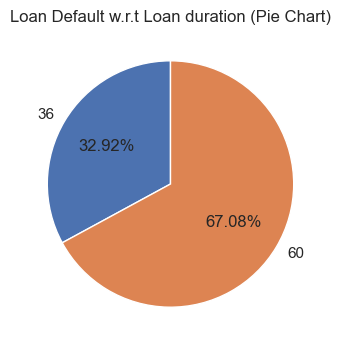

In [704]:
plt.figure(figsize=(6, 4))
plt.title('Loan Default w.r.t Loan duration')
ax = sns.barplot(x='loanPeriod', y="Charged Off%", data=loandf_duration.reset_index(), estimator=np.median)
 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.25, '{:1.2f}'.format(height), ha="center")
 

labels = loandf_duration.reset_index()['loanPeriod'].tolist()
sizes = [p.get_height() for p in ax.patches]
 

total = sum(sizes)
sizes = [(size / total) * 100 for size in sizes]
 

plt.clf()  
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Loan Default w.r.t Loan duration (Pie Chart)')
 

plt.show()



Check the dataSet for dti and find the impact loan status based on dti range 
    
Create new derived attribute dti_level for bucketing dti range
 
 Here dti  indicates - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [705]:
def dti_level(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "A(<5)"
    elif 5 <= x < 10:
        return "B(5-10)"
    elif 10 <= x < 15:
        return "C(10-15)"
    elif 15 <= x < 20:
        return "D(15-20)"
    else:
        return "E(>20)"

loandf['dti_level'] = loandf.dti.apply(lambda x: dti_level(x))

In [706]:
loandf['dti_level'].value_counts()

C(10-15)    9893
D(15-20)    9108
B(5-10)     8062
E(>20)      7514
A(<5)       5140
Name: dti_level, dtype: int64

Create Pivot table loandf_dti for the attribute dti and loan status, which will help us analyze the impact of dti on loan status
Adding new columns Aggregate for aggregate number of loan for each dti_level and loan status to pivot table 

In [707]:
loandf_dti = pd.pivot_table(loandf, values='loan_amnt', index='dti_level', columns='loan_status', aggfunc='count')
loandf_dti['Aggregate'] = loandf_dti['Charged Off'] + loandf_dti['Current'] + loandf_dti['Fully Paid']
loandf_dti['Charged Off%'] = round(loandf_dti['Charged Off']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Current%'] = round(loandf_dti['Current']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Fully Paid %'] = round(loandf_dti['Fully Paid']/loandf_dti['Aggregate'] *100, 2)
loandf_dti

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
dti_level,,,,,,,
A(<5),625,96,4419,5140,12.16,1.87,85.97
B(5-10),1001,201,6860,8062,12.42,2.49,85.09
C(10-15),1399,269,8225,9893,14.14,2.72,83.14
D(15-20),1394,284,7430,9108,15.31,3.12,81.58
E(>20),1208,290,6016,7514,16.08,3.86,80.06


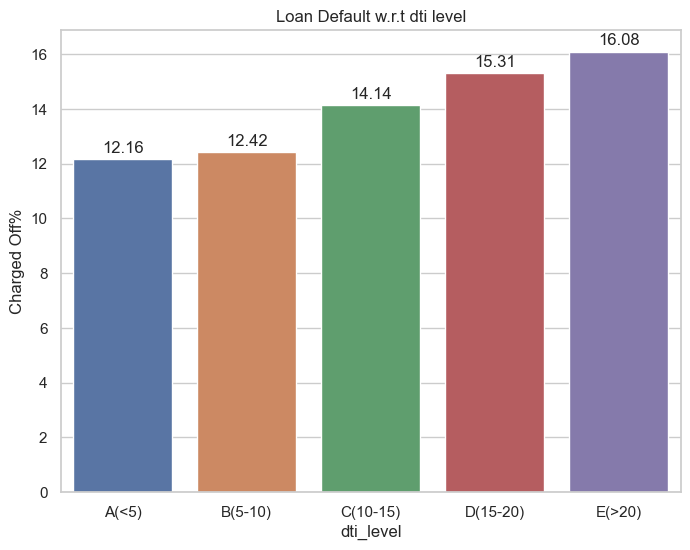

In [708]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t dti level')
ax=sns.barplot(x='dti_level',y = "Charged Off%", data=loandf_dti.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 

From the above bar chart, chance for loan default increases with increase in dti level 

In [709]:
loandf['total_acc'].value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

    Lets check the impact of total_acc on loan default
    Here total_acc indicates the total number of credit lines currently in the borrower's credit file.

Aggregate the 10 or more total_acc into one called 10+

In [710]:
loandf['total_acc'] = loandf['total_acc'].apply(lambda x: x if x< 10 else '10+')

In [711]:
loandf_total_acc = pd.pivot_table(loandf, values='loan_amnt', index='total_acc', columns='loan_status', aggfunc='count')
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid
total_acc,,,
2,1.0,NaN,3.0
3,42.0,3.0,137.0
4,79.0,5.0,336.0
5,91.0,9.0,452.0
6,107.0,9.0,567.0
7,132.0,15.0,681.0
8,172.0,17.0,817.0
9,166.0,24.0,890.0
10+,4837.0,1058.0,29067.0


Create Pivot table loandf_total_acc for the attribute total_acc and loan_status, which will help us analyze the impact of total_acc on loan status

Convert the NaN value to 0

Adding new columns Aggregate for aggregate number of total_acc for each loan_status and percentage of total_acc for each loan_status to pivot table 

In [712]:
loandf_total_acc.loc[pd.isnull(loandf_total_acc['Current']), ['Current']] = 0
loandf_total_acc['Aggregate'] = loandf_total_acc['Charged Off'] + loandf_total_acc['Current'] + loandf_total_acc['Fully Paid']
loandf_total_acc['Charged Off%'] = round(loandf_total_acc['Charged Off']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Current%'] = round(loandf_total_acc['Current']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Fully Paid %'] = round(loandf_total_acc['Fully Paid']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
total_acc,,,,,,,
2,1.0,0.0,3.0,4.0,25.00,0.00,75.00
3,42.0,3.0,137.0,182.0,23.08,1.65,75.27
4,79.0,5.0,336.0,420.0,18.81,1.19,80.00
5,91.0,9.0,452.0,552.0,16.49,1.63,81.88
6,107.0,9.0,567.0,683.0,15.67,1.32,83.02
7,132.0,15.0,681.0,828.0,15.94,1.81,82.25
8,172.0,17.0,817.0,1006.0,17.10,1.69,81.21
9,166.0,24.0,890.0,1080.0,15.37,2.22,82.41
10+,4837.0,1058.0,29067.0,34962.0,13.84,3.03,83.14


 home_ownership - The home ownership status provided by the borrower during registration. The available values are: RENT, OWN, MORTGAGE, OTHER.

    Lets check the impact of home_ownership on loan default

In [713]:
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Combine NONE into OTHER category

In [714]:
loandf['home_ownership'] = loandf['home_ownership'].apply(lambda x: x if x != 'NONE' else 'OTHER')
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of loan_status for each home_ownership

In [715]:
loandf_home_ownership = pd.pivot_table(loandf, values='loan_amnt', index='home_ownership', columns='loan_status', aggfunc='count')
loandf_home_ownership.loc[pd.isnull(loandf_home_ownership['Current']), ['Current']] = 0
loandf_home_ownership['Aggregate'] = loandf_home_ownership['Charged Off'] + loandf_home_ownership['Current'] + loandf_home_ownership['Fully Paid']
loandf_home_ownership['Charged Off%'] = round(loandf_home_ownership['Charged Off']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Current%'] = round(loandf_home_ownership['Current']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Fully Paid %'] = round(loandf_home_ownership['Fully Paid']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
home_ownership,,,,,,,
MORTGAGE,2327.0,638.0,14694.0,17659.0,13.18,3.61,83.21
OTHER,18.0,0.0,83.0,101.0,17.82,0.00,82.18
OWN,443.0,83.0,2532.0,3058.0,14.49,2.71,82.80
RENT,2839.0,419.0,15641.0,18899.0,15.02,2.22,82.76


    Lets check the impact of annual income with loan default status
    Here, annual_inc is the self-reported annual income provided by the borrower during registration.

In [716]:
print(loandf.annual_inc.max())
print(loandf.annual_inc.min())

6000000.0
4000.0


Apply bucketing for Annual income

In [717]:
def sal_range(x):
    'divide the time of the day into four categories'
    if x < 10000:
        return "A(<10K)"
    elif 10000 <= x < 20000:
        return "B(10K-20K)"
    elif 20000 <= x < 50000:
        return "C(20K-50K)"
    elif 50000 <= x < 750000:
        return "D(50K-75K)"
    elif 75000 <= x < 100000:
        return "E(75K-100K)"
    else:
        return "F(>100K)"

loandf['salary_range'] = loandf.annual_inc.apply(lambda x: sal_range(x))  
loandf['salary_range'].value_counts()


D(50K-75K)    24998
C(20K-50K)    13621
B(10K-20K)      986
A(<10K)          80
F(>100K)         32
Name: salary_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of losalary_range for each loan_status

In [718]:
loandf_salary_range = pd.pivot_table(loandf, values='loan_amnt', index='salary_range', columns='loan_status', aggfunc='count')
loandf_salary_range.loc[pd.isnull(loandf_salary_range['Current']), ['Current']] = 0
loandf_salary_range['Aggregate'] = loandf_salary_range['Charged Off'] + loandf_salary_range['Current'] + loandf_salary_range['Fully Paid']
loandf_salary_range['Charged Off%'] = round(loandf_salary_range['Charged Off']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Current%'] = round(loandf_salary_range['Current']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Fully Paid %'] = round(loandf_salary_range['Fully Paid']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
salary_range,,,,,,,
A(<10K),14.0,1.0,65.0,80.0,17.50,1.25,81.25
B(10K-20K),213.0,7.0,766.0,986.0,21.60,0.71,77.69
C(20K-50K),2222.0,319.0,11080.0,13621.0,16.31,2.34,81.34
D(50K-75K),3175.0,813.0,21010.0,24998.0,12.70,3.25,84.05
F(>100K),3.0,0.0,29.0,32.0,9.38,0.00,90.62


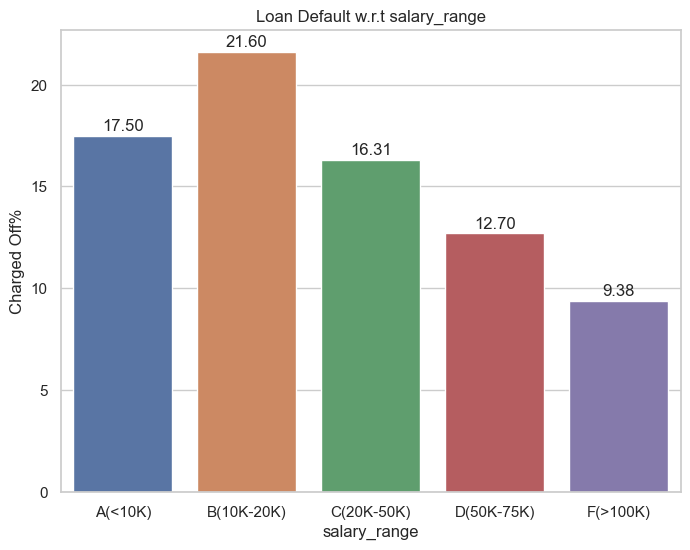

In [719]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t salary_range')
ax=sns.barplot(x= 'salary_range',y = "Charged Off%", data=loandf_salary_range.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 

From the above bar chart we can see that for salary range 10,000 to 20,000 there are more chances of defaulting the loan

Interest Rates
Lets check the impact of Interest Rate on the loan on loan default

Convert int_rate to int_rate% as float from string and find the minimum and maximum values

In [720]:
loandf['int_rate%'] = loandf['int_rate'].str[:-1].astype(float)
loandf = loandf.drop('int_rate', axis=1)
print(loandf['int_rate%'].max())
print(loandf['int_rate%'].min())

24.59
5.42


apply bucketing for int_rate%

In [721]:
def int_rate(x):
    'Create int_rate range'
    if x < 10:
        return "A(<10%)"
    elif 10 <= x < 15:
        return "B(10%-15%)"
    elif 15 <= x < 20:
        return "C(15%-20%)"
    else:
        return "D(>20%)"

loandf['int_rate_range'] = loandf['int_rate%'].apply(lambda x: int_rate(x))  
loandf['int_rate_range'].value_counts()

B(10%-15%)    19045
A(<10%)       12142
C(15%-20%)     7658
D(>20%)         872
Name: int_rate_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of int_rate_range for each loan_status

In [722]:
loandf_int_rate_range = pd.pivot_table(loandf, values='loan_amnt', index='int_rate_range', columns='loan_status', aggfunc='count')
loandf_int_rate_range['Aggregate'] = loandf_int_rate_range['Charged Off'] + loandf_int_rate_range['Current'] + loandf_int_rate_range['Fully Paid']
loandf_int_rate_range['Charged Off%'] = round(loandf_int_rate_range['Charged Off']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range['Current%'] = round(loandf_int_rate_range['Current']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range['Fully Paid %'] = round(loandf_int_rate_range['Fully Paid']/loandf_int_rate_range['Aggregate'] *100, 2)
loandf_int_rate_range


loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
int_rate_range,,,,,,,
A(<10%),799,75,11268,12142,6.58,0.62,92.80
B(10%-15%),2738,531,15776,19045,14.38,2.79,82.84
C(15%-20%),1794,432,5432,7658,23.43,5.64,70.93
D(>20%),296,102,474,872,33.94,11.70,54.36


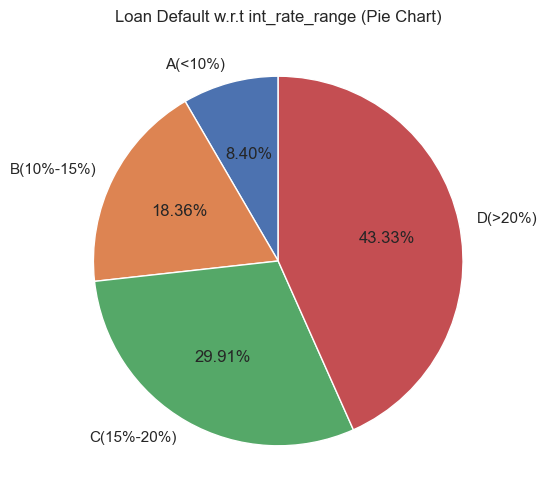

In [723]:
# Your existing data and plot code
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t int_rate_range')
ax = sns.barplot(x='int_rate_range', y="Charged Off%", data=loandf_int_rate_range.reset_index())

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.2f}'.format(height), ha="center")

# Extract data from the bar plot
labels = loandf_int_rate_range.reset_index()['int_rate_range'].tolist()
sizes = [p.get_height() for p in ax.patches]

# Convert the bar plot data into percentages
total = sum(sizes)
sizes = [(size / total) * 100 for size in sizes]

# Create a pie chart
plt.clf()  # Clear the existing figure
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Loan Default w.r.t int_rate_range (Pie Chart)')

# Display the pie chart
plt.show()

Loan Amt
  Lets check the impact of loan amount on chance of loan default

In [724]:
print(loandf['loan_amnt'].max())
print(loandf['loan_amnt'].min())

35000
500


APPLY BUCKETING ON LOAN AMOUNT

In [725]:
def loan_amt_range(x):
    'Craete int_rate range'
    if x < 1000:
        return "A(<1K)"
    elif 1000 <= x < 5000:
        return "B(1K-5K)"
    elif 5000 <= x < 10000:
        return "C(5K-10K)"
    elif 10000 <= x < 15000:
        return "D(10K-15K)"
    elif 15000 <= x < 20000:
        return "E(15K-20K)"
    elif 20000 <= x < 30000:
        return "F(20K-30K)"
    else:
        return "G(>30K)"

loandf['loan_amt_range'] = loandf['loan_amnt'].apply(lambda x: loan_amt_range(x))  
loandf['loan_amt_range'].value_counts()

C(5K-10K)     12178
D(10K-15K)     8924
B(1K-5K)       7505
F(20K-30K)     5033
E(15K-20K)     4860
G(>30K)        1205
A(<1K)           12
Name: loan_amt_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of iloan_amt_range for each loan_status

In [726]:
loandf_loan_amt_range = pd.pivot_table(loandf, values='loan_amnt', index='loan_amt_range', columns='loan_status', aggfunc='count')
loandf_loan_amt_range.loc[pd.isnull(loandf_loan_amt_range['Current']), ['Current']] = 0
loandf_loan_amt_range['Aggregate'] = loandf_loan_amt_range['Charged Off'] + loandf_loan_amt_range['Current'] + loandf_loan_amt_range['Fully Paid']
loandf_loan_amt_range['Charged Off%'] = round(loandf_loan_amt_range['Charged Off']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range['Current%'] = round(loandf_loan_amt_range['Current']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range['Fully Paid %'] = round(loandf_loan_amt_range['Fully Paid']/loandf_loan_amt_range['Aggregate'] *100, 2)
loandf_loan_amt_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loan_amt_range,,,,,,,
A(<1K),1.0,0.0,11.0,12.0,8.33,0.00,91.67
B(1K-5K),1026.0,73.0,6406.0,7505.0,13.67,0.97,85.36
C(5K-10K),1567.0,157.0,10454.0,12178.0,12.87,1.29,85.84
D(10K-15K),1158.0,270.0,7496.0,8924.0,12.98,3.03,84.00
E(15K-20K),785.0,209.0,3866.0,4860.0,16.15,4.30,79.55
F(20K-30K),841.0,298.0,3894.0,5033.0,16.71,5.92,77.37
G(>30K),249.0,133.0,823.0,1205.0,20.66,11.04,68.30


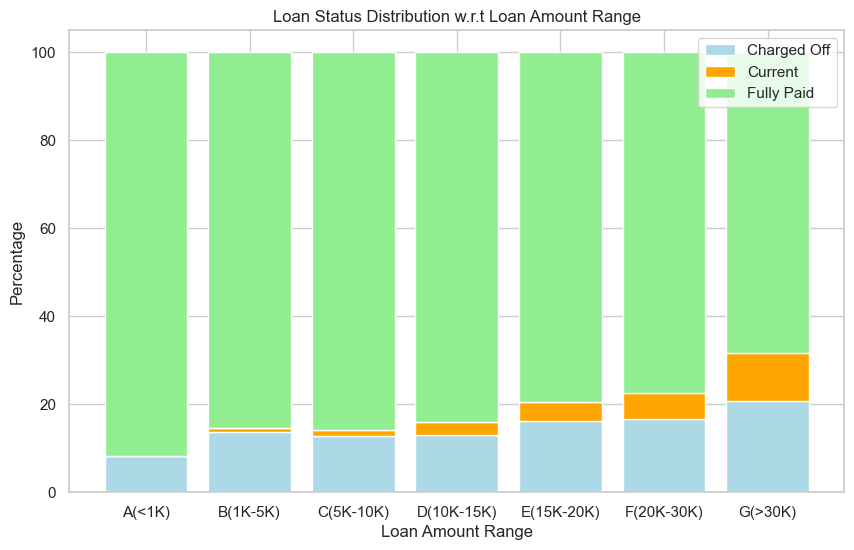

In [727]:
plt.figure(figsize=(10, 6))

charged_off = loandf_loan_amt_range['Charged Off%']
current = loandf_loan_amt_range['Current%']
fully_paid = loandf_loan_amt_range['Fully Paid %']

plt.bar(loandf_loan_amt_range.index, charged_off, label='Charged Off', color='lightblue')
plt.bar(loandf_loan_amt_range.index, current, bottom=charged_off, label='Current', color='orange')
plt.bar(loandf_loan_amt_range.index, fully_paid, bottom=charged_off + current, label='Fully Paid', color='lightgreen')

plt.xlabel('Loan Amount Range')
plt.ylabel('Percentage')
plt.title('Loan Status Distribution w.r.t Loan Amount Range')
plt.legend()

plt.show()

Chance for loan default is highest for loan amount greater than 30,000. 

Installments

Lets check the impact of loan installment with loan default

In [728]:
print(loandf['installment'].max())
print(loandf['installment'].min())

1305.19
15.69


APPLY BUCKETING ON LOAN INSTALLMET BASED ON MIN AND MAX VALUE

In [729]:
def loan_installment_range(x):
    'Craete int_rate range'
    if x < 50:
        return "A(<50)"
    elif 50 <= x < 100:
        return "B(50-100)"
    elif 100 <= x < 200:
        return "C(100-200)"
    elif 200 <= x < 500:
        return "D(200-500)"
    elif 500 <= x < 750:
        return "E(500-750)"
    elif 750 <= x < 1000:
        return "F(750-1000)"
    else:
        return "G(>1000)"

loandf['loan_installment_range'] = loandf['installment'].apply(lambda x: loan_installment_range(x))  
loandf['loan_installment_range'].value_counts()

D(200-500)     19296
C(100-200)      9249
E(500-750)      5065
B(50-100)       3190
F(750-1000)     1840
A(<50)           842
G(>1000)         235
Name: loan_installment_range, dtype: int64

Create Pivot Table, handle NAN values and add new columns aggregate and percentage of installment_range for each loan_status

In [730]:
loandf_installment_range = pd.pivot_table(loandf, values='loan_amnt', index='loan_installment_range', columns='loan_status', aggfunc='count')
loandf_installment_range.loc[pd.isnull(loandf_installment_range['Current']), ['Current']] = 0
loandf_installment_range['Aggregate'] = loandf_installment_range['Charged Off'] + loandf_installment_range['Current'] + loandf_installment_range['Fully Paid']
loandf_installment_range['Charged Off%'] = round(loandf_installment_range['Charged Off']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range['Current%'] = round(loandf_installment_range['Current']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range['Fully Paid %'] = round(loandf_installment_range['Fully Paid']/loandf_installment_range['Aggregate'] *100, 2)
loandf_installment_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loan_installment_range,,,,,,,
A(<50),135.0,10.0,697.0,842.0,16.03,1.19,82.78
B(50-100),464.0,47.0,2679.0,3190.0,14.55,1.47,83.98
C(100-200),1214.0,150.0,7885.0,9249.0,13.13,1.62,85.25
D(200-500),2673.0,608.0,16015.0,19296.0,13.85,3.15,83.00
E(500-750),792.0,244.0,4029.0,5065.0,15.64,4.82,79.55
F(750-1000),324.0,81.0,1435.0,1840.0,17.61,4.40,77.99
G(>1000),25.0,0.0,210.0,235.0,10.64,0.00,89.36


Grade and Sub Grade

Grade Vs Loan Status

In [731]:
Grade_loanstatus = pd.crosstab(index=loandf["grade"],columns=loandf["loan_status"]).apply(lambda x: x/x.sum(), axis=1)
print(Grade_loanstatus)

loan_status  Charged Off   Current  Fully Paid
grade                                         
A               0.059693  0.003966    0.936341
B               0.118552  0.028702    0.852745
C               0.166337  0.032601    0.801062
D               0.210665  0.041832    0.747503
E               0.251583  0.062984    0.685433
F               0.304099  0.069590    0.626311
G               0.319620  0.053797    0.626582


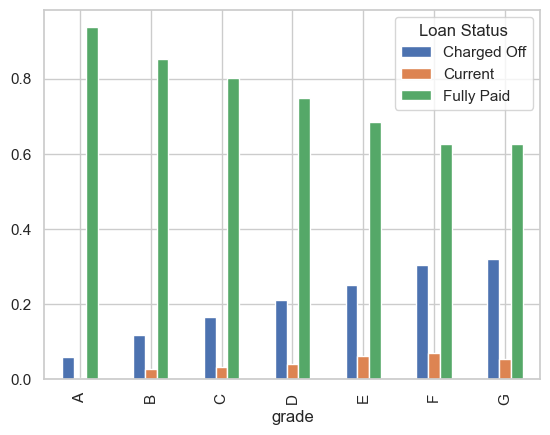

In [732]:
Grade_loanstatus.plot.bar(stacked=False)
plt.legend(title='Loan Status')

Loans to Grade 'G' - is prone to more default. Plot clearly shows from Grade A to G the Chargeoff i.e., Loan-default increases and 'Fully Paid' decreases 

In [733]:
Subgrade_loanstatus = pd.crosstab(index=loandf["sub_grade"],columns=loandf["loan_status"]).apply(lambda x: x/x.sum(), axis=1)
print(Subgrade_loanstatus)

loan_status  Charged Off   Current  Fully Paid
sub_grade                                     
A1              0.026339  0.000000    0.973661
A2              0.049072  0.000000    0.950928
A3              0.056906  0.000000    0.943094
A4              0.061677  0.004505    0.933818
A5              0.079139  0.009847    0.911014
B1              0.093443  0.018033    0.888525
B2              0.110841  0.027224    0.861935
B3              0.116901  0.031539    0.851560
B4              0.130971  0.029857    0.839172
B5              0.131657  0.032914    0.835429
C1              0.157303  0.037921    0.804775
C2              0.159622  0.039781    0.800597
C3              0.176586  0.026815    0.796599
C4              0.171521  0.024272    0.804207
C5              0.175379  0.026981    0.797639
D1              0.179377  0.000000    0.820623
D2              0.201039  0.045994    0.752967
D3              0.218244  0.048593    0.733163
D4              0.219164  0.064220    0.716616
D5           

<Figure size 1000x800 with 0 Axes>

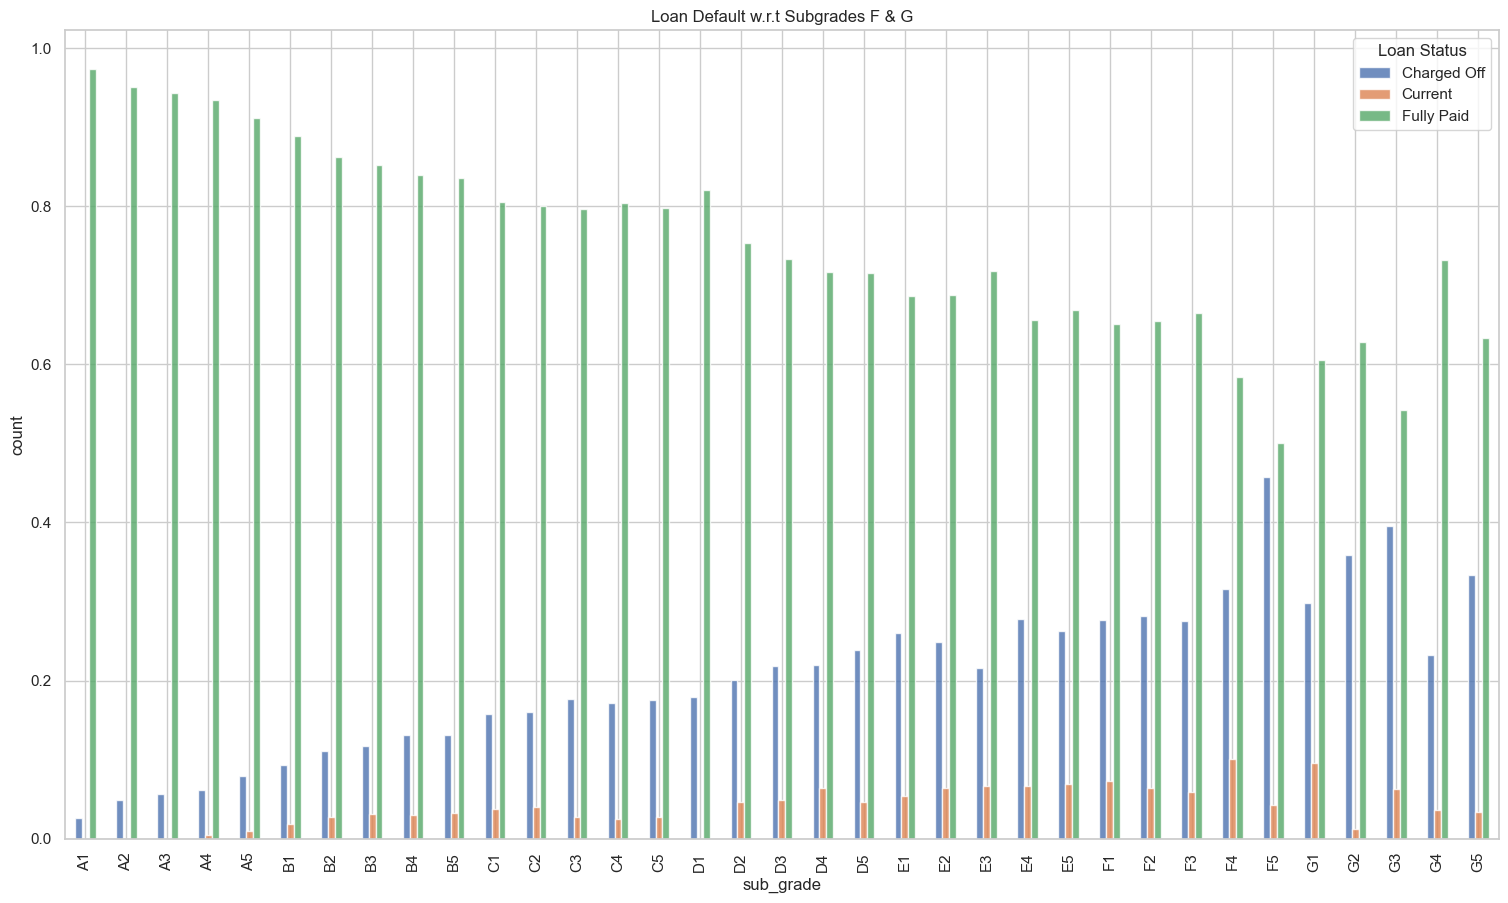

In [734]:
plt.figure(figsize=(10, 8))
ax = Subgrade_loanstatus.plot(alpha=0.8, kind='bar', stacked=False, figsize=(18.5, 10.5))
plt.title('Loan Default w.r.t Subgrades F & G')
plt.legend(title='Loan Status')
ax.set_ylabel('count')
plt.show()

## Outlier Analysis

<Axes: xlabel='int_rate_outlier'>

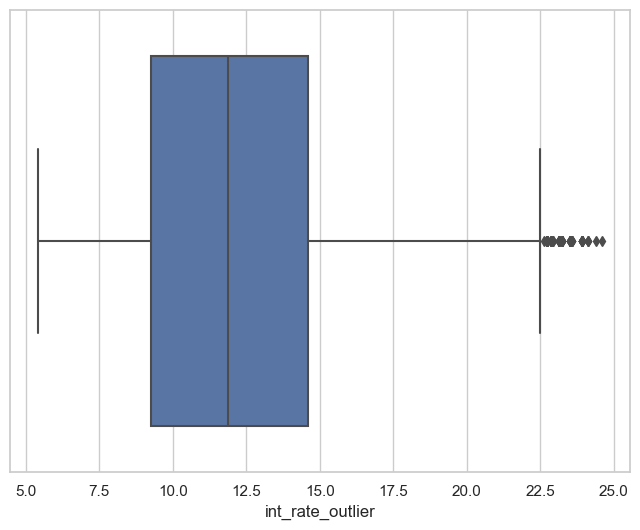

In [735]:

sns.set_style("whitegrid")
loandf["int_rate_outlier"] = loandf["int_rate%"]
loandf["int_rate_outlier"] = loandf["int_rate_outlier"].astype(float)
plt.figure(figsize=(8, 6))
sns.boxplot(x=loandf["int_rate_outlier"])

In [736]:
def outliers(col_name):
    plt.figure(figsize=(8, 6))
    ax=sns.boxplot(x=loandf[col_name])

Check outliers for dti , annual_inc , loan_amnt

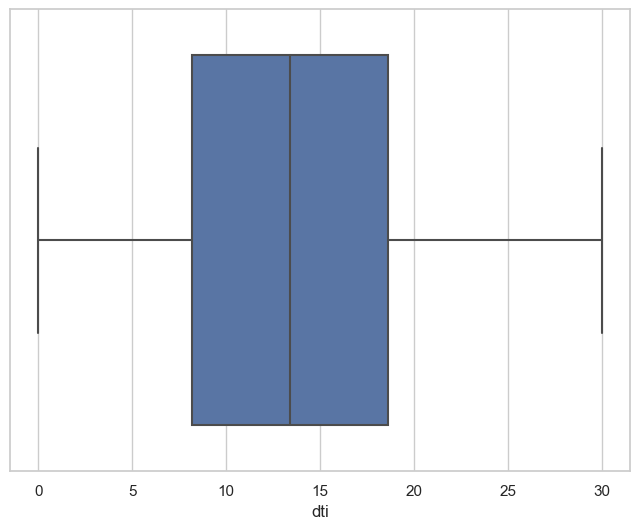

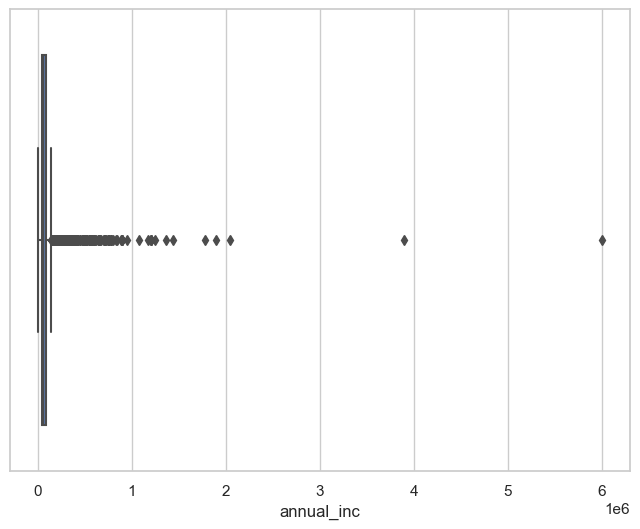

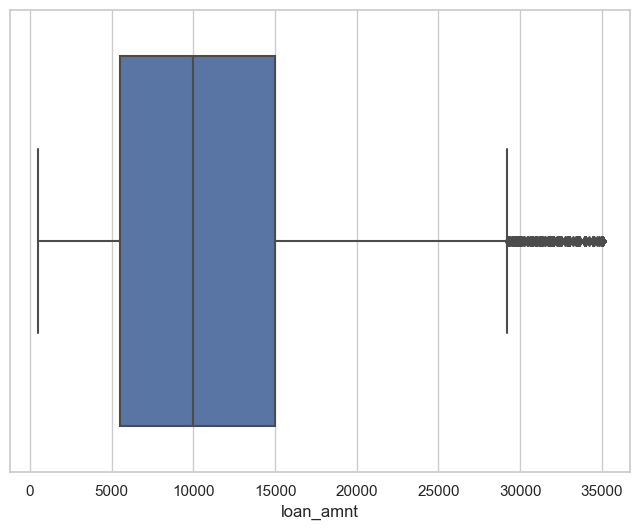

In [737]:

outliers("dti")

outliers('annual_inc')

outliers("loan_amnt")

Handling the Outliers

Create new dataframe loandf_New from the original loandf

In [738]:
loandf_New = loandf
loandf_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

Remove these columns as we need not check for outliers in these columns

In [739]:
#filt_df = df.loc[:, df.columns!=[('User_id','Col1')] ]

out_filt_df = loandf_New.drop([ 
                    'id',
                    'member_id',
                    
                    'grade',
                    'sub_grade',
                    'emp_length',
                    'home_ownership',
                    'verification_status',
                    'issue_d',
                    'loan_status',
                    'purpose',
                    'addr_state',
                    'delinq_2yrs',
                    'inq_last_6mths',
                    'open_acc',
                    'pub_rec',
                    'revol_util',
                    'out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee',
                    'last_pymnt_d',
                    'last_credit_pull_d',
                    
                    'pub_rec_bankruptcies',
                    'loanPeriod',
                    'zip_code_num',
                    'dti_level','salary_range','int_rate%','int_rate_range',
                    'loan_amt_range','loan_installment_range','int_rate_outlier',
                    'total_acc'
                  ],axis=1)

In [740]:
out_filt_df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,13648,5863.155187,5833.84,5000.00,863.16,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,1687,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,2956,3005.666844,3005.67,2400.00,605.67,649.91
3,10000,10000,10000.0,339.31,49200.0,20.00,5598,12231.890000,12231.89,10000.00,2214.92,357.48
4,3000,3000,3000.0,67.79,80000.0,17.94,27783,3513.330000,3513.33,2475.94,1037.39,67.79


Apply precentile 0.05 - 0.95 range to find outliers

In [741]:
low = .05
high = .95
quant_df = out_filt_df.quantile([low, high])
print(quant_df)

      loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0.05     2400.0       2400.0      1873.658000       71.246     24000.0   2.13   
0.95    25000.0      25000.0     24736.572264      762.996    142000.0  23.84   

      revol_bal   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0.05      321.8   1887.957036         1420.408         1339.842   
0.95    41656.4  30245.118530        29627.236        24999.982   

      total_rec_int  last_pymnt_amnt  
0.05        186.168           43.340  
0.95       7575.812        12183.944  


Apply low and high percentiles into the dataframe and apply Null to outliers values

In [742]:
out_filt_df = out_filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [743]:
out_filt_df.isnull().sum()*100/out_filt_df.shape[0] 

loan_amnt          12.957647
funded_amnt        11.872388
funded_amnt_inv     9.993957
installment         9.993957
annual_inc         10.552954
dti                10.014101
revol_bal           9.993957
total_pymnt         9.993957
total_pymnt_inv     9.993957
total_rec_prncp     9.993957
total_rec_int       9.993957
last_pymnt_amnt     9.993957
dtype: float64

We will decide whether or not to remove the outliers in our further analysis or keep it seperately and analyse them to see if we find some meaningful insights from them

In [744]:
out_filt_df.fillna(out_filt_df.mean(), inplace=True)

out_filt_df.isnull().sum()*100/out_filt_df.shape[0]  # check for missing values after imputation

loan_amnt          0.0
funded_amnt        0.0
funded_amnt_inv    0.0
installment        0.0
annual_inc         0.0
dti                0.0
revol_bal          0.0
total_pymnt        0.0
total_pymnt_inv    0.0
total_rec_prncp    0.0
total_rec_int      0.0
last_pymnt_amnt    0.0
dtype: float64

In [745]:
loandf.update(out_filt_df)
loandf = loandf.dropna()
loandf.isnull().sum()*100/loandf.shape[0] 


id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collecti

In [746]:
for column in loandf.columns:
    unique_values = loandf[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'id':
[1077501 1077430 1077175 ...  132892  119043  112496]
Unique values in column 'member_id':
[1296599 1314167 1313524 ...  132889  119040  112493]
Unique values in column 'loan_amnt':
[ 5000.          2500.         10299.70275978 10000.
  3000.          7000.          5600.          5375.
  6500.         12000.          9000.          3600.
  6000.          9200.         20250.         21000.
 15000.          4000.          8500.          4375.
 12400.         10800.         12500.          9600.
  4400.         14000.         11000.         16000.
  7100.         13000.         17500.         17675.
  8000.          3500.         16425.          8200.
 20975.          6400.         14400.          7250.
 18000.         11800.          4500.         10500.
 15300.         20000.          6200.          7200.
  9500.         18825.         24000.          5500.
 19750.         13650.         10625.          8850.
  6375.         11100.          4200.         

# Data Preparation

In [747]:
loandf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loanPeriod,zip_code_num,int_rate%,int_rate_outlier
count,3.783500e+04,3.783500e+04,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,...,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000,37835.000000
mean,6.899869e+05,8.597532e+05,10351.972555,10290.237422,9973.276689,310.186449,63976.293401,13.362485,0.145817,0.866816,...,1928.427877,1.334466,94.552722,12.133188,2028.589588,0.041496,42.557103,502.284525,12.071015,12.071015
std,2.029235e+05,2.542853e+05,5096.186360,5064.622375,5299.651093,153.526530,25183.340397,5.438714,0.490501,1.066483,...,1547.506358,7.178910,690.378098,148.109176,2644.784359,0.200363,10.694760,329.910390,3.734431,3.734431
min,5.473400e+04,8.036400e+04,1000.000000,1000.000000,750.000000,32.440000,19200.000000,0.000000,0.000000,0.000000,...,27.980000,0.000000,0.000000,0.000000,33.740000,0.000000,36.000000,7.000000,5.420000,5.420000
25%,5.210765e+05,6.731990e+05,6000.000000,6000.000000,5914.107605,188.020000,45000.000000,9.340000,0.000000,0.000000,...,782.125000,0.000000,0.000000,0.000000,269.970000,0.000000,36.000000,200.000000,9.320000,9.320000
50%,6.693350e+05,8.555920e+05,10000.000000,10000.000000,9871.252594,308.709751,62322.000000,13.330214,0.000000,1.000000,...,1561.160000,0.000000,0.000000,0.000000,733.900000,0.000000,36.000000,448.000000,11.860000,11.860000
75%,8.392890e+05,1.049062e+06,13000.000000,13000.000000,12902.582030,391.510000,76800.000000,17.510000,0.000000,1.000000,...,2442.505000,0.000000,0.000000,0.000000,2444.770000,0.000000,60.000000,852.000000,14.610000,14.610000
max,1.077501e+06,1.314167e+06,24975.000000,24975.000000,24736.560330,762.950000,141996.000000,25.500000,11.000000,8.000000,...,7575.760000,180.200000,29623.350000,7002.190000,12183.760000,2.000000,60.000000,999.000000,24.590000,24.590000


Checking for the class imbalance problem in loan status prediction

In [748]:
# Filter out rows with 'Current' in the 'Loan_Status' column
loandf = loandf[loandf['loan_status'] != 'Current']

# Reset the index if needed
loandf.reset_index(drop=True, inplace=True)

In [749]:
loandf['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5203
Name: loan_status, dtype: int64

In [750]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
loandf['loan_status'] = label_encoder.fit_transform(loandf['loan_status'])

In [751]:
loandf['loan_status'].value_counts()

1    31534
0     5203
Name: loan_status, dtype: int64

In [752]:
loandf.head(20)

loandf['emp_length'].value_counts()

10+ years    8359
< 1 year     4322
2 years      4196
3 years      3940
4 years      3283
5 years      3147
1 year       3062
6 years      2132
7 years      1685
8 years      1405
9 years      1206
Name: emp_length, dtype: int64

In [753]:
ordinal_mapping = {
    'emp_length': {'10+ years': 10, '< 1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years' : 5, '1 year': 1, '6 years': 6, '7 years': 7,'8 years': 8, '9 years':9}
}

# Use map to replace categorical values with integers based on the defined order
loandf.replace(ordinal_mapping, inplace=True)

In [754]:
loandf['emp_length'].value_counts()

10    8359
1     7384
2     4196
3     3940
4     3283
5     3147
6     2132
7     1685
8     1405
9     1206
Name: emp_length, dtype: int64

In [755]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36737 entries, 0 to 36736
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36737 non-null  int64  
 1   member_id                36737 non-null  int64  
 2   loan_amnt                36737 non-null  float64
 3   funded_amnt              36737 non-null  float64
 4   funded_amnt_inv          36737 non-null  float64
 5   installment              36737 non-null  float64
 6   grade                    36737 non-null  object 
 7   sub_grade                36737 non-null  object 
 8   emp_length               36737 non-null  int64  
 9   home_ownership           36737 non-null  object 
 10  annual_inc               36737 non-null  float64
 11  verification_status      36737 non-null  object 
 12  issue_d                  36737 non-null  object 
 13  loan_status              36737 non-null  int64  
 14  purpose               

Data Mapping for large catagorical veriable to numerical values for better understading in application development.

In [756]:
check_data = loandf[['loan_amnt', 'installment', 'loan_status',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'addr_state', 'emp_length',
                     'int_rate%']]

In [757]:
check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36737 entries, 0 to 36736
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       36737 non-null  float64
 1   installment     36737 non-null  float64
 2   loan_status     36737 non-null  int64  
 3   annual_inc      36737 non-null  float64
 4   dti             36737 non-null  float64
 5   home_ownership  36737 non-null  object 
 6   purpose         36737 non-null  object 
 7   loanPeriod      36737 non-null  int64  
 8   addr_state      36737 non-null  object 
 9   emp_length      36737 non-null  int64  
 10  int_rate%       36737 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 3.1+ MB


In [758]:
check_data.nunique()

loan_amnt           715
installment       12678
loan_status           2
annual_inc         4246
dti                2173
home_ownership        4
purpose              14
loanPeriod            2
addr_state           49
emp_length           10
int_rate%           336
dtype: int64

In [759]:
unique_p = check_data['home_ownership'].unique().tolist()
print(unique_p)

['RENT', 'OWN', 'MORTGAGE', 'OTHER']


In [760]:
ownership_mapping = {
    "RENT": 1,
    "OWN": 2,
    "MORTGAGE": 3,
    "OTHER": 4
}

In [761]:
purpose_mapping = {
    "credit_card": 1,
    "car": 2,
    "small_business": 3,
    "other": 4,
    "wedding": 5,
    "debt_consolidation": 6,
    "home_improvement": 7,
    "major_purchase": 8,
    "medical": 9,
    "moving": 10,
    "vacation": 11,
    "house": 12,
    "renewable_energy": 13,
    "educational": 14,
}

In [762]:
# Dictionary to map state abbreviations to integer values
state_mapping = {
    "AZ": 1,
    "GA": 2,
    "IL": 3,
    "CA": 4,
    "NC": 5,
    "TX": 6,
    "VA": 7,
    "MO": 8,
    "CT": 9,
    "UT": 10,
    "FL": 11,
    "PA": 12,
    "MN": 13,
    "NY": 14,
    "NJ": 15,
    "OR": 16,
    "KY": 17,
    "OH": 18,
    "SC": 19,
    "RI": 20,
    "LA": 21,
    "MA": 22,
    "WA": 23,
    "WI": 24,
    "AL": 25,
    "NV": 26,
    "AK": 27,
    "CO": 28,
    "MD": 29,
    "WV": 30,
    "VT": 31,
    "MI": 32,
    "DC": 33,
    "SD": 34,
    "NH": 35,
    "AR": 36,
    "NM": 37,
    "KS": 38,
    "HI": 39,
    "OK": 40,
    "MT": 41,
    "WY": 42,
    "DE": 43,
    "MS": 44,
    "TN": 45,
    "IA": 46,
    "NE": 47,
    "ID": 48,
    "IN": 49
}


import pandas as pd

# Create new columns with mapped values
check_data['home_ownership'] = check_data['home_ownership'].map(ownership_mapping)
check_data['purpose'] = check_data['purpose'].map(purpose_mapping)
check_data['state'] = check_data['addr_state'].map(state_mapping)


In [787]:
check_data.discribe()

AttributeError: 'DataFrame' object has no attribute 'discribe'

## SMOTE

In [764]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = check_data[['loan_amnt', 'installment', 'loan_status',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'state',
                     'int_rate%']]


# Separate features (X) and target (y)
X = data.drop(['loan_status'], axis=1)
y_loan_status = data['loan_status']

X['home_ownership'] = pd.to_numeric(X['home_ownership'], errors='coerce')
X['purpose'] = pd.to_numeric(X['purpose'], errors='coerce')
X['loanPeriod'] = pd.to_numeric(X['loanPeriod'], errors='coerce')
X['state'] = pd.to_numeric(X['state'], errors='coerce')
# Split the data into training and testing sets for Loan_Status prediction
X_train_loan_status, X_test_loan_status, y_train_loan_status, y_test_loan_status = train_test_split(X, y_loan_status, test_size=0.2, random_state=42)

# Apply SMOTE to balance the class distribution for Loan_Status prediction
smote_loan_status = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_loan_status, y_train_resampled_loan_status = smote_loan_status.fit_resample(X_train_loan_status, y_train_loan_status)


### Loan Status

Random Forest

In [765]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
RFC_loan_status = RandomForestClassifier(random_state=42)
RFC_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the test set for Loan_Status prediction
y_pred_loan_status = RFC_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance for Loan_Status prediction
accuracy_loan_status = accuracy_score(y_test_loan_status, y_pred_loan_status)
report_loan_status = classification_report(y_test_loan_status, y_pred_loan_status)

print("Loan_Status Prediction Accuracy:", accuracy_loan_status)


mse = mean_squared_error(y_test_loan_status, y_pred_loan_status)
r2 = r2_score(y_test_loan_status, y_pred_loan_status)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

print("Loan_Status Classification Report:\n", report_loan_status)

Loan_Status Prediction Accuracy: 0.7857920522591181
MSE: 0.2142
R^2: -0.7904
Loan_Status Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.23      0.23      1021
           1       0.88      0.88      0.88      6327

    accuracy                           0.79      7348
   macro avg       0.55      0.55      0.55      7348
weighted avg       0.79      0.79      0.79      7348



Decision Tree

In [766]:
from sklearn.tree import DecisionTreeClassifier


DTC_loan_status = DecisionTreeClassifier(random_state=42)
DTC_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the test set for Loan_Status prediction
y_pred_loan_status = DTC_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance for Loan_Status prediction
accuracy_loan_status = accuracy_score(y_test_loan_status, y_pred_loan_status)
report_loan_status = classification_report(y_test_loan_status, y_pred_loan_status)

print("Loan_Status Prediction Accuracy:", accuracy_loan_status)


mse = mean_squared_error(y_test_loan_status, y_pred_loan_status)
r2 = r2_score(y_test_loan_status, y_pred_loan_status)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

print("Loan_Status Classification Report:\n", report_loan_status)

Loan_Status Prediction Accuracy: 0.7129831246597713
MSE: 0.2870
R^2: -1.3990
Loan_Status Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.31      0.23      1021
           1       0.87      0.78      0.82      6327

    accuracy                           0.71      7348
   macro avg       0.53      0.54      0.53      7348
weighted avg       0.78      0.71      0.74      7348



Training Accuracy: 1.0
Test Accuracy: 0.7129831246597713


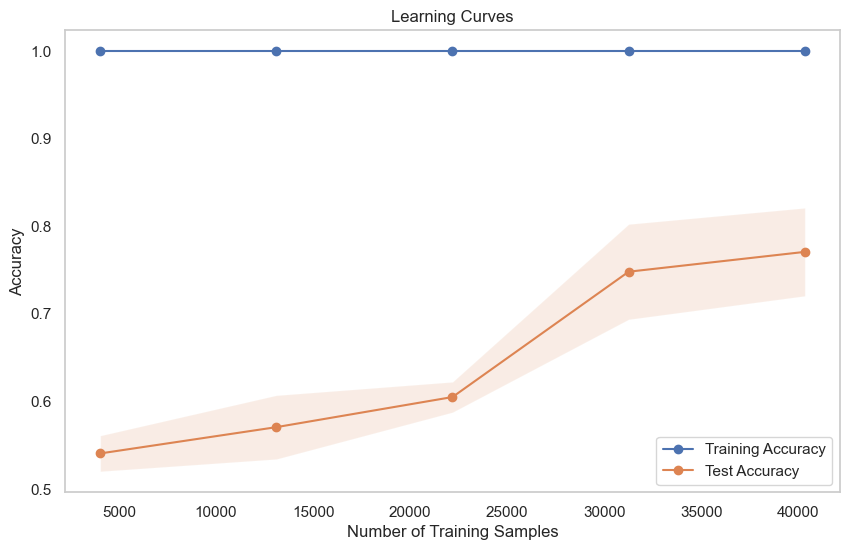

In [767]:
from sklearn.model_selection import learning_curve

# Initialize the Decision Tree Classifier
DTC_loan_status = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
DTC_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the training and test sets
y_pred_train = DTC_loan_status.predict(X_train_resampled_loan_status)
y_pred_test = DTC_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance on both sets
accuracy_train = accuracy_score(y_train_resampled_loan_status, y_pred_train)
accuracy_test = accuracy_score(y_test_loan_status, y_pred_test)

# Print the accuracy on both sets
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Check for overfitting using learning curves
train_sizes, train_scores, test_scores = learning_curve(DTC_loan_status, X_train_resampled_loan_status, y_train_resampled_loan_status, cv=5)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label="Test Accuracy", marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid()
plt.show()

XGBoost

In [768]:
import xgboost as xgb

xgb_loan_status = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the classifier on the resampled data for Loan_Status prediction
xgb_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the test set for Loan_Status prediction
y_pred_loan_status = xgb_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance for Loan_Status prediction
accuracy_loan_status = accuracy_score(y_test_loan_status, y_pred_loan_status)
report_loan_status = classification_report(y_test_loan_status, y_pred_loan_status)

print("Loan_Status Prediction Accuracy:", accuracy_loan_status)


mse = mean_squared_error(y_test_loan_status, y_pred_loan_status)
r2 = r2_score(y_test_loan_status, y_pred_loan_status)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')


Loan_Status Prediction Accuracy: 0.7431954273271638
MSE: 0.2568
R^2: -1.1464


Training Accuracy: 0.7755782124013171
Test Accuracy: 0.7431954273271638


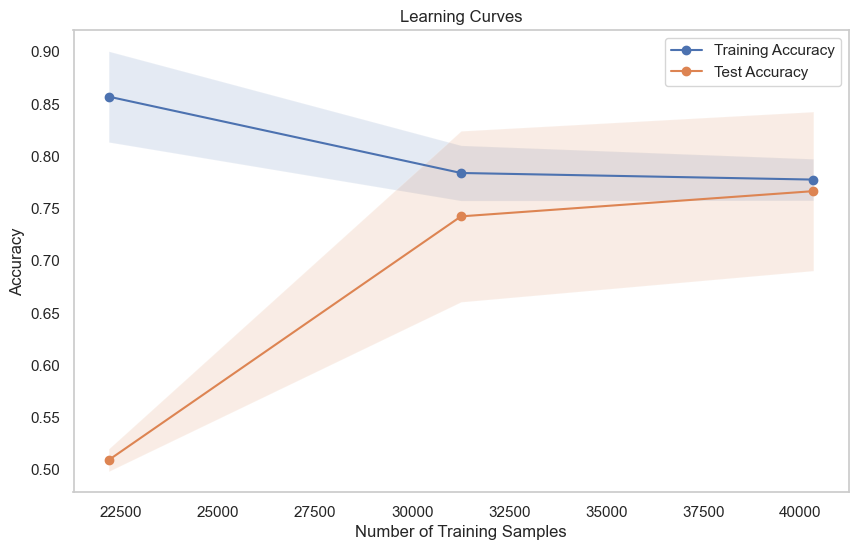

In [769]:
# Initialize the Decision Tree Classifier
clf_loan_status = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the classifier on the training data
clf_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the training and test sets
y_pred_train = clf_loan_status.predict(X_train_resampled_loan_status)
y_pred_test = clf_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance on both sets
accuracy_train = accuracy_score(y_train_resampled_loan_status, y_pred_train)
accuracy_test = accuracy_score(y_test_loan_status, y_pred_test)

# Print the accuracy on both sets
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Check for overfitting using learning curves
train_sizes, train_scores, test_scores = learning_curve(clf_loan_status, X_train_resampled_loan_status, y_train_resampled_loan_status, cv=5)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', linestyle='-')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label="Test Accuracy", marker='o', linestyle='-')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid()
plt.show()

Logistic Regression

In [770]:
from sklearn.linear_model import LogisticRegression

# Create an XGBoost classifier
xgb_loan_status = LogisticRegression(random_state=42)

# Fit the classifier on the resampled data for Loan_Status prediction
xgb_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the test set for Loan_Status prediction
y_pred_loan_status = xgb_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance for Loan_Status prediction
accuracy_loan_status = accuracy_score(y_test_loan_status, y_pred_loan_status)
report_loan_status = classification_report(y_test_loan_status, y_pred_loan_status)

print("Loan_Status Prediction Accuracy:", accuracy_loan_status)


mse = mean_squared_error(y_test_loan_status, y_pred_loan_status)
r2 = r2_score(y_test_loan_status, y_pred_loan_status)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

print("Loan_Status Classification Report:\n", report_loan_status)

Loan_Status Prediction Accuracy: 0.5748502994011976
MSE: 0.4251
R^2: -2.5535
Loan_Status Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.62      0.29      1021
           1       0.90      0.57      0.70      6327

    accuracy                           0.57      7348
   macro avg       0.55      0.60      0.49      7348
weighted avg       0.80      0.57      0.64      7348



### Intrest Rate

In [771]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature Selection
selected_features = ['loan_amnt', 'installment',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'state'
                    ]

# Target variable
target = 'int_rate%'

# Splitting the dataset into features (X) and target (y)
X = data[selected_features]
y = data[target]


# Splitting data into training and testing sets
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Creating a Column Transformer for Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in selected_features if col not in categorical_features]),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [772]:
print(X_train_int.shape)
print(X_test_int.shape)
print(y_train_int.shape)
print(y_test_int.shape)

(29389, 8)
(7348, 8)
(29389,)
(7348,)


In [773]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Training the model
rf_model.fit(X_train_int, y_train_int)

# Predicting on test data
y_pred_int = rf_model.predict(X_test_int)

# Evaluating the model
mse = mean_squared_error(y_test_int, y_pred_int)
r2 = r2_score(y_test_int, y_pred_int)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 1.963013150546976
R² Score: 0.8577321548047496


XGBOOST

In [774]:
from xgboost import XGBRegressor

# XGBoost Regressor model
xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective ='reg:squarederror', random_state=42))
])
# Fit the regressor on the training data
xgboost_model.fit(X_train_int, y_train_int)

# Make predictions on the test set
y_pred_int = xgboost_model.predict(X_test_int)

# Evaluate the regressor's performance
# For regression, consider using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R^2.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_int, y_pred_int)
r2 = r2_score(y_test_int, y_pred_int)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')


MSE: 2.1126
R^2: 0.8469


Elactic Net Regression

In [775]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer  # Assuming you have a preprocessor

# Define your preprocessor here (example placeholder, customize as needed)
# preprocessor = ColumnTransformer(transformers=[...])

# Define alpha and l1_ratio hyperparameters
alpha = 0.1  # Adjust as needed
l1_ratio = 0.5  # Adjust as needed

# ElasticNet Regressor model
elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
])

# Fit the regressor on the training data
elastic_net_model.fit(X_train_int, y_train_int)

# Make predictions on the test set
y_pred_int = elastic_net_model.predict(X_test_int)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test_int, y_pred_int)
r2 = r2_score(y_test_int, y_pred_int)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')




MSE: 10.2876
R^2: 0.2544


In [776]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer  # Assuming you have a preprocessor

# Assuming the preprocessor is defined somewhere above
# preprocessor = ColumnTransformer(transformers=[...])

# Define the pipeline with a placeholder for ElasticNet
elastic_net_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Define the parameter grid, note the use of 'regressor__' prefix to specify ElasticNet parameters
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1],  # Adjust these values and ranges as needed
    'regressor__l1_ratio': [0.2, 0.5, 0.8]  # Adjust these values and ranges as needed
}

# Setup GridSearchCV
cv = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring='r2')  # Or use another scoring parameter as needed

# Fit GridSearchCV
cv.fit(X_train_int, y_train_int)

# Print best parameters and best score
print("Best parameters:", cv.best_params_)
print("Best score:", cv.best_score_)

# Optionally, you can use the best estimator to make predictions
y_pred_int = cv.predict(X_test_int)

# Evaluate the model's performance with the best found parameters
mse = mean_squared_error(y_test_int, y_pred_int)
r2 = r2_score(y_test_int, y_pred_int)

print(f'MSE with Best Parameters: {mse:.4f}')
print(f'R^2 with Best Parameters: {r2:.4f}')


Best parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.5}
Best score: 0.26023339285104047
MSE with Best Parameters: 10.1749
R^2 with Best Parameters: 0.2626


## Final Model Preparations

### Loan Status

In [777]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
RFC_loan_status = RandomForestClassifier(random_state=42)
RFC_loan_status.fit(X_train_resampled_loan_status, y_train_resampled_loan_status)

# Make predictions on the test set for Loan_Status prediction
y_pred_loan_status = RFC_loan_status.predict(X_test_loan_status)

# Evaluate the classifier's performance for Loan_Status prediction
accuracy_loan_status = accuracy_score(y_test_loan_status, y_pred_loan_status)
report_loan_status = classification_report(y_test_loan_status, y_pred_loan_status)

print("Loan_Status Prediction Accuracy:", accuracy_loan_status)


mse = mean_squared_error(y_test_loan_status, y_pred_loan_status)
r2 = r2_score(y_test_loan_status, y_pred_loan_status)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

print("Loan_Status Classification Report:\n", report_loan_status)

Loan_Status Prediction Accuracy: 0.7857920522591181
MSE: 0.2142
R^2: -0.7904
Loan_Status Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.23      0.23      1021
           1       0.88      0.88      0.88      6327

    accuracy                           0.79      7348
   macro avg       0.55      0.55      0.55      7348
weighted avg       0.79      0.79      0.79      7348



In [778]:
X_test_loan_status.head(10)

,loan_amnt,installment,annual_inc,dti,home_ownership,purpose,loanPeriod,state,int_rate%
28833,10000.00000,329.120000,63658.278175,13.330214,2,6,36,14,11.36
4009,10000.00000,312.910000,57000.000000,13.090000,1,6,36,13,7.90
17990,7200.00000,218.360000,31500.000000,6.630000,1,6,36,8,5.79
263,18000.00000,571.560000,78000.000000,7.000000,1,1,36,14,8.90
34921,17000.00000,574.100000,51996.000000,16.870000,3,6,36,2,13.16
15557,10299.70276,308.709751,85000.000000,13.330214,3,3,60,6,7.29
9731,10299.70276,308.709751,86000.000000,6.000000,1,6,36,7,5.99
32720,5175.00000,172.330000,63658.278175,13.120000,1,6,36,11,12.18
29669,12000.00000,407.090000,60000.000000,8.420000,3,7,36,9,13.48
8993,18000.00000,666.110000,58240.000000,7.110000,1,6,36,22,19.69


In [779]:
test = RFC_loan_status.predict([[17000.00000, 574.100000, 51996.000000, 16.870000, 3, 6, 36, 2, 13.16]])

In [780]:
y_pred_prob_loan_status = RFC_loan_status.predict_proba([[17000.00000, 574.100000, 51996.000000, 16.870000, 3, 6, 36, 2, 13.16]])


In [781]:
print(test)

print(y_pred_prob_loan_status)

[1]
[[0.27 0.73]]


In [782]:
import joblib

# Assuming 'rf_model' is your optimized Random Forest pipeline
joblib.dump(RFC_loan_status, 'rf_model1.joblib')


['rf_model1.joblib']

### Interest Rate

In [783]:
from xgboost import XGBRegressor

# XGBoost Regressor model
xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective ='reg:squarederror', random_state=42))
])
# Fit the regressor on the training data
xgboost_model.fit(X_train_int, y_train_int)

# Make predictions on the test set
y_pred_int = xgboost_model.predict(X_test_int)



# Evaluate the regressor's performance
# For regression, consider using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R^2.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_int, y_pred_int)
r2 = r2_score(y_test_int, y_pred_int)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

MSE: 2.1126
R^2: 0.8469


In [784]:
X_test_int.head(10)

,loan_amnt,installment,annual_inc,dti,home_ownership,purpose,loanPeriod,state
28833,10000.00000,329.120000,63658.278175,13.330214,2,6,36,14
4009,10000.00000,312.910000,57000.000000,13.090000,1,6,36,13
17990,7200.00000,218.360000,31500.000000,6.630000,1,6,36,8
263,18000.00000,571.560000,78000.000000,7.000000,1,1,36,14
34921,17000.00000,574.100000,51996.000000,16.870000,3,6,36,2
15557,10299.70276,308.709751,85000.000000,13.330214,3,3,60,6
9731,10299.70276,308.709751,86000.000000,6.000000,1,6,36,7
32720,5175.00000,172.330000,63658.278175,13.120000,1,6,36,11
29669,12000.00000,407.090000,60000.000000,8.420000,3,7,36,9
8993,18000.00000,666.110000,58240.000000,7.110000,1,6,36,22


In [785]:
# Assuming these are the correct column names based on your model's training data
column_names = ['loan_amnt', 'installment',
                    'annual_inc', 'dti', 'home_ownership', 'purpose', 
                    'loanPeriod', 'state']

# Your input data for prediction
input_data = [[180000.00000, 400.110000, 58240.000000, 7.110000, 1, 4, 36, 22]]

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame(input_data, columns=column_names)

# Make predictions using the dataframe
y_pred = xgboost_model.predict(input_df)

print(y_pred)

[10.090835]


In [786]:
import joblib

# Assuming 'rf_model' is your optimized Random Forest pipeline
joblib.dump(xgboost_model, 'XGBModel1.joblib')


['XGBModel1.joblib']